In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, ElasticNet

In [37]:
df = pd.read_csv("manufacturing.csv")
df.head(10)

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000
5,229.178823,8.498306,1947.631786,53136.690654,1.203707e+07,99.998786
6,187.517442,19.412851,3640.248155,42478.694500,6.593260e+06,100.000000
7,278.354600,7.070944,1968.229758,77834.818230,2.156722e+07,95.732723
8,292.732552,20.432896,5981.373734,94223.147069,2.508452e+07,64.623599
9,176.688304,14.145782,2499.394266,34049.372335,5.515789e+06,100.000000


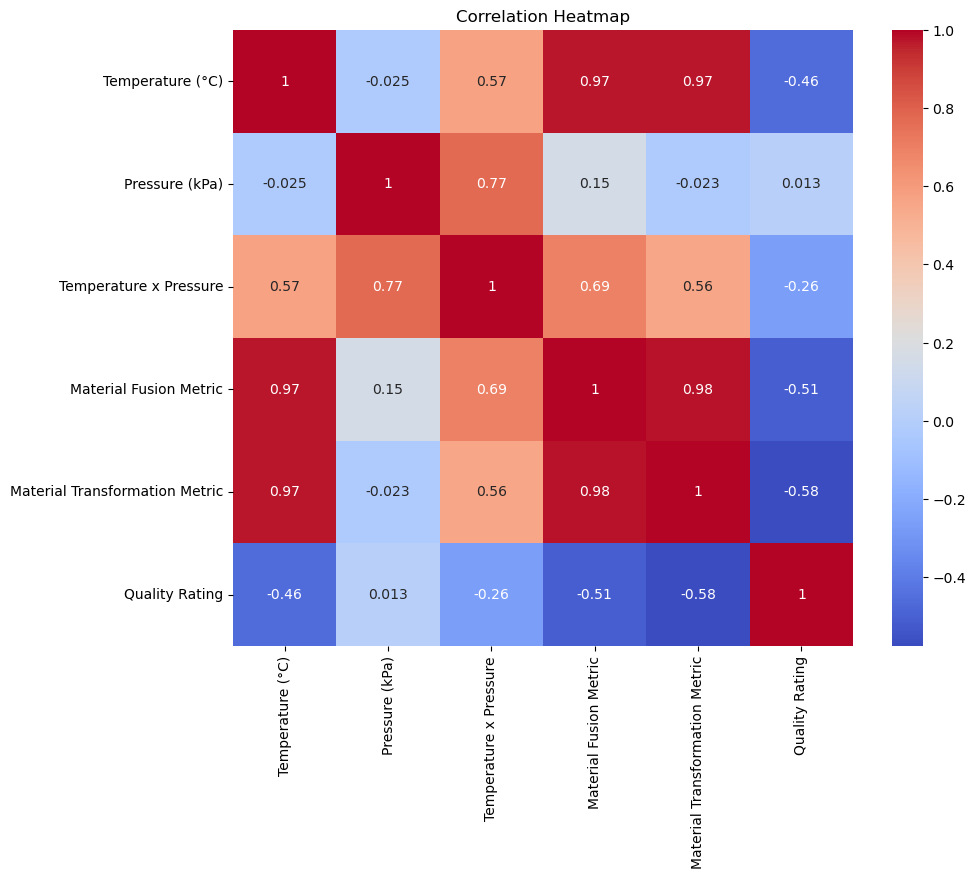

In [38]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [39]:
df = df.drop(columns=["Pressure (kPa)", "Temperature x Pressure", "Material Fusion Metric"])
df

,Temperature (°C),Material Transformation Metric,Quality Rating
0,209.762701,9.229576e+06,99.999971
1,243.037873,1.435537e+07,99.985703
2,220.552675,1.072839e+07,99.999758
3,208.976637,9.125702e+06,99.999975
4,184.730960,6.303792e+06,100.000000
...,...,...,...
3952,156.811578,3.855501e+06,100.000000
3953,197.850406,7.744742e+06,99.999997
3954,241.357144,1.405957e+07,99.989318
3955,209.040239,9.134036e+06,99.999975


In [40]:
x = df.drop(columns="Quality Rating").to_numpy()
y = df["Quality Rating"]
print("Features Shape: ", x.shape)
print("Labels: Shape", y.shape)

Features Shape:  (3957, 2)
Labels: Shape (3957,)


In [41]:
# Z-score normalization for feature scaling
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)
x_scaled.shape

(3957, 2)

In [42]:
#Polynomial Transformation
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x_scaled)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)

print("Training Data:", x_train.shape, y_train.shape)
print("Testing Data:", x_test.shape, y_test.shape)

Training Data: (3165, 10) (3165,)
Testing Data: (792, 10) (792,)


In [44]:
model = Ridge(alpha=1)
model.fit(x_train,y_train)

Ridge(alpha=1)

In [45]:
y_pred = model.predict(x_test)

In [46]:
r2 = r2_score(y_test , y_pred)
r2

0.9513151040702021

In [47]:
import joblib

joblib.dump(model, "PolySklearn.pkl")

['PolySklearn.pkl']